In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import urllib.request
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix

# Import the IMDb csv file for movies releasedbetween 1972- 2016
all_us_rel=pd.read_csv('All U.S. Released Movies_ 1972-2016.csv', engine='python')
# Need the Movie id to iterate through web pages to obtain technical detail
c_id= [x for x in all_us_rel['Const']]

In [ ]:
# Creating a dataframe with technical descriptions and description of movie
# Import function from another ipynb file

def techdet(x):
    global df
    df=pd.DataFrame()
    for ids in x:
        # Get description of movie
        try:
            url1= 'https://www.imdb.com/title/{}/?ref_=ttls_li_tt'.format(ids)
            page1=bs(urllib.request.urlopen(url1),"html.parser")
            diction={}
            diction['Title']=ids
            diction['Description']=[x.text.strip() for x in page1.find_all('div', attrs={'class': re.compile( "summary_text")})][0]
            url= 'https://www.imdb.com/title/{}/technical?ref_=tt_dt_spec'.format(ids)
            page=bs(urllib.request.urlopen(url),"html.parser")
            # Technical specifications
            tech=[x.text.strip() for x in page.find_all('td', attrs={'class': re.compile( "label")})]
            # Details for Technical specifications
            details=[x.text.strip() for x in page.find_all('td')]

            for element in details:
                if element not in tech:
                    diction[details[details.index(element)-1]]= element
                elif element == 'Color':

                    diction['Color']= element
                else:
                    continue
            df=df.append(diction, ignore_index=True)
        except:
            pass

techdet(c_id)

# Ouput as a file to retrieve for later
df.to_csv('movie_details')

In [2]:
# The 1972-2016 dataset
all_us_rel

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,1,tt0110912,4/23/13,4/23/13,NaN,Pulp Fiction,https://www.imdb.com/title/tt0110912/,movie,8.9,154.0,1994.0,"Crime, Drama",1749330.0,5/21/94,Quentin Tarantino
1,2,tt1872181,4/23/13,4/23/13,NaN,The Amazing Spider-Man 2,https://www.imdb.com/title/tt1872181/,movie,6.6,142.0,2014.0,"Action, Adventure, Sci-Fi",404528.0,4/10/14,Marc Webb
2,3,tt0111161,4/23/13,4/23/13,NaN,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,movie,9.3,142.0,1994.0,Drama,2231193.0,9/10/94,Frank Darabont
3,4,tt0076759,4/23/13,4/23/13,NaN,Star Wars,https://www.imdb.com/title/tt0076759/,movie,8.6,121.0,1977.0,"Action, Adventure, Fantasy, Sci-Fi",1186177.0,5/25/77,George Lucas
4,5,tt0088763,4/23/13,4/23/13,NaN,Back to the Future,https://www.imdb.com/title/tt0088763/,movie,8.5,116.0,1985.0,"Adventure, Comedy, Sci-Fi",996685.0,7/3/85,Robert Zemeckis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,9937,tt0775440,2/12/15,2/12/15,NaN,Cell,https://www.imdb.com/title/tt0775440/,movie,4.3,98.0,2016.0,"Action, Drama, Horror, Sci-Fi, Thriller",23839.0,5/19/16,Tod Williams
9937,9938,tt3748172,2/12/15,2/12/15,NaN,Gerald's Game,https://www.imdb.com/title/tt3748172/,movie,6.6,103.0,2017.0,"Drama, Horror, Thriller",79573.0,9/19/17,Mike Flanagan
9938,9939,tt3319460,2/12/15,2/12/15,NaN,Lisey's Story,https://www.imdb.com/title/tt3319460/,tvSeries,NaN,NaN,NaN,Drama,NaN,NaN,NaN
9939,9940,tt4425200,2/12/15,2/12/15,NaN,John Wick: Chapter 2,https://www.imdb.com/title/tt4425200/,movie,7.5,122.0,2017.0,"Action, Crime, Thriller",341164.0,1/30/17,Chad Stahelski


In [3]:
# Retrieve the output file
df=pd.read_csv('movie_details.csv')
df=df[['Title','Description']]
# Rename Title to Const to match Const column in all_us_rel
df.rename(columns={'Title':'Const'}, inplace=True)
# Merge on Const column
new=pd.merge(all_us_rel, df, on='Const')
new=new[new['Title Type']=='movie']
new = new.assign(Description_x=new['Description_y'])
new = new[new.columns[:-1]]
new.rename(columns={'Description_x':'Description'},inplace=True)
new=new[['Title','Description','Genres']]
new = new[new['Genres'].notna()]
new = new.reset_index(drop=True)
new

,Title,Description,Genres
0,Pulp Fiction,"The lives of two mob hitmen, a boxer, a gangst...","Crime, Drama"
1,The Amazing Spider-Man 2,"When New York is put under siege by Oscorp, it...","Action, Adventure, Sci-Fi"
2,The Shawshank Redemption,Two imprisoned men bond over a number of years...,Drama
3,Star Wars,Luke Skywalker joins forces with a Jedi Knight...,"Action, Adventure, Fantasy, Sci-Fi"
4,Back to the Future,"Marty McFly, a 17-year-old high school student...","Adventure, Comedy, Sci-Fi"
...,...,...,...
8745,Mojave,"A suicidal artist goes into the desert, where ...","Drama, Thriller"
8746,The Sea of Trees,A suicidal American befriends a Japanese man l...,"Drama, Fantasy, Mystery"
8747,Cell,When a mysterious cell phone signal causes apo...,"Action, Drama, Horror, Sci-Fi, Thriller"
8748,Gerald's Game,A couple tries to spice up their marriage in a...,"Drama, Horror, Thriller"


In [4]:
# Clean the Text in Description
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text
# Split words by space and put into a list for each description
new['Clean'] = new['Description'].apply(lambda x: clean_text(x))

# Find all the unique genres in the set
allgenres=[]
for gen in new['Genres']:
    
    if ',' in gen:
        vals=[x.strip() for x in gen.split(',')]
        for y in vals:
            allgenres.append(y)
        
    else:
        allgenres.append(gen)
# Remove duplicates and turn set back into list
allgenres=list(set(allgenres))
allgenres=[x.lower() for x in allgenres]
allgenres

['sci-fi',
 'news',
 'mystery',
 'documentary',
 'history',
 'biography',
 'drama',
 'romance',
 'war',
 'western',
 'horror',
 'animation',
 'adventure',
 'sport',
 'comedy',
 'family',
 'musical',
 'thriller',
 'fantasy',
 'music',
 'action',
 'crime']

In [5]:
# Lowercase all the genres

def lowercasegenres(genres):
    for index in range(len(genres)):
        
        if 'Sci-Fi' in genres[index]:
            genres[index]=genres[index].replace('Sci-Fi', 'sci-fi')
            genres[index]=genres[index].lower()
        else:
            genres[index]=genres[index].lower()
            
# Remove all types of genres from the clean descriptions

def keyremove(x):
    for ind in range(len(x)):
        for gen in allgenres:
            if gen in x[ind]:
                x[ind]=x[ind].replace(gen,'')
            else:
                pass
lowercasegenres(new['Genres'])
keyremove(new['Clean'])



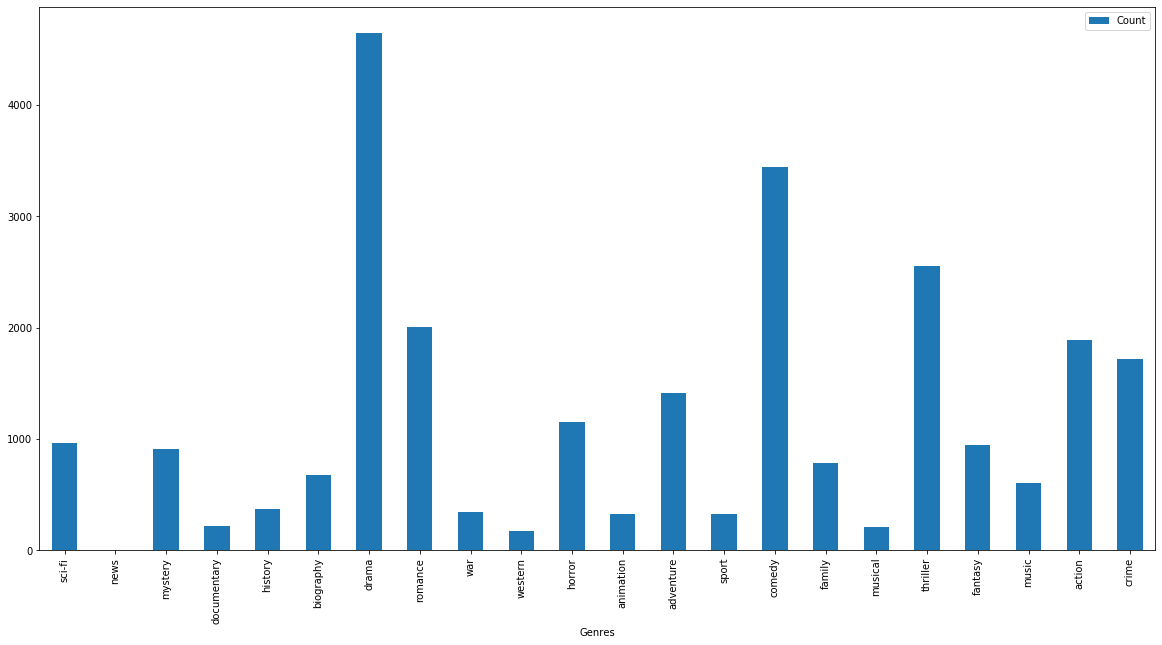

         Genres  Count
0        sci-fi    964
1          news      7
2       mystery    907
3   documentary    221
4       history    372
5     biography    676
6         drama   4648
7       romance   2006
8           war    342
9       western    170
10       horror   1151
11    animation    326
12    adventure   1410
13        sport    328
14       comedy   3444
15       family    784
16      musical    206
17     thriller   2552
18      fantasy    950
19        music    603
20       action   1891
21        crime   1723


In [6]:
genres_1={'Genres': allgenres}
freq_count=pd.DataFrame(genres_1, columns=['Genres'])
count=[]
for x in allgenres:
    count.append(new.Genres.str.count(x).sum())
freq_count['Count']=count
# Plot frequency of each movie genre
freq_count.plot(x='Genres', y='Count', kind='bar', figsize=(20,10))
plt.show()
print(freq_count)

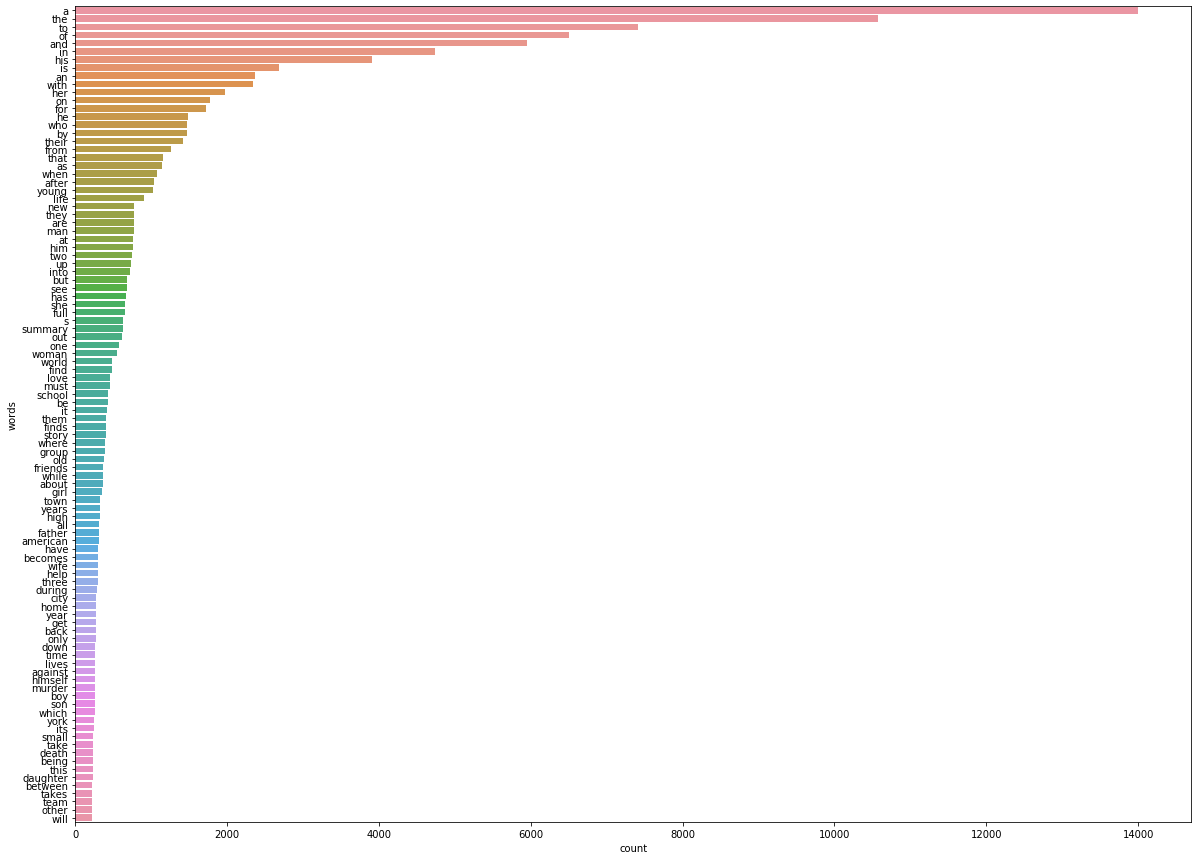

In [7]:
# find frequency of words in description

def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 

    # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 

    # visualize words and frequencies
    plt.figure(figsize=(20,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'words') 
    plt.show()
# print 100 most frequent words 
freq_words(new['Clean'], 100)

In [8]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

new['Clean'] = new['Clean'].apply(lambda x: remove_stopwords(x))
# Turn Genres into lists
def createlist(col):
    for x in range(len(col)):
        if ',' in col[x]:
            col[x]=col[x].replace(' ','').split(',')
        else:
            col[x]=[col[x]]
# Run createlist function once, else will make nested lists            
createlist(new['Genres'])
new['Genres']

0                                  [crime, drama]
1                     [action, adventure, sci-fi]
2                                         [drama]
3            [action, adventure, fantasy, sci-fi]
4                     [adventure, comedy, sci-fi]
                          ...                    
8745                            [drama, thriller]
8746                    [drama, fantasy, mystery]
8747    [action, drama, horror, sci-fi, thriller]
8748                    [drama, horror, thriller]
8749                    [action, crime, thriller]
Name: Genres, Length: 8750, dtype: object

In [9]:
# Encode the Genres column
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(new['Genres'])
print(multilabel_binarizer.classes_)
# transform target variable
y = multilabel_binarizer.transform(new['Genres'])


['action' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'history' 'horror' 'music'
 'musical' 'mystery' 'news' 'romance' 'sci-fi' 'sport' 'thriller' 'war'
 'western']


In [10]:
# Using TF-IDF to classify text
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

# Split dataset into training and validation set
# Leave the new['Clean'] column as text
X_train, X_test, y_train, y_test = train_test_split(new['Clean'], y, test_size=0.33, random_state=9)

Xtrain_tf = tfidf_vectorizer.fit_transform(X_train)
Xtesttf = tfidf_vectorizer.transform(X_test)


In [11]:
# Classifying the Data
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
# Fit model on train data
clf.fit(Xtrain_tf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [12]:
# Predict
y_pred = clf.predict(Xtesttf)
# Example
print(multilabel_binarizer.inverse_transform(y_pred)[0])
# Evaluate performance of classifier
print(f1_score(y_test, y_pred, average="micro"))
# Use the multiclass confusion matrix
print(multilabel_confusion_matrix(y_test, y_pred))

('comedy', 'drama')
0.4062741064541013
[[[2210   37]
  [ 508  133]]

 [[2449   16]
  [ 381   42]]

 [[2791    0]
  [  97    0]]

 [[2660    2]
  [ 218    8]]

 [[1558  219]
  [ 652  459]]

 [[2279   25]
  [ 448  136]]

 [[2814    0]
  [  74    0]]

 [[ 813  511]
  [ 423 1141]]

 [[2653    1]
  [ 228    6]]

 [[2576    2]
  [ 297   13]]

 [[2764    0]
  [ 124    0]]

 [[2499    3]
  [ 364   22]]

 [[2764    0]
  [ 119    5]]

 [[2819    0]
  [  69    0]]

 [[2575    3]
  [ 306    4]]

 [[2884    0]
  [   4    0]]

 [[2206   36]
  [ 522  124]]

 [[2589    4]
  [ 251   44]]

 [[2779    0]
  [ 104    5]]

 [[1949   65]
  [ 648  226]]

 [[2773    0]
  [ 113    2]]

 [[2835    0]
  [  53    0]]]


In [13]:
rfc=RandomForestClassifier(random_state=3)
rfc.fit(Xtrain_tf, y_train)
y_pred1 = rfc.predict(Xtesttf)
f1= f1_score(y_test, y_pred1, average="micro") 
print(f1)
print(multilabel_binarizer.inverse_transform(y_pred1)[0])
print(multilabel_confusion_matrix(y_test, y_pred1))

0.3965763195435093
('drama',)
[[[2215   32]
  [ 540  101]]

 [[2441   24]
  [ 395   28]]

 [[2791    0]
  [  97    0]]

 [[2659    3]
  [ 209   17]]

 [[1489  288]
  [ 698  413]]

 [[2243   61]
  [ 413  171]]

 [[2813    1]
  [  72    2]]

 [[ 712  612]
  [ 459 1105]]

 [[2654    0]
  [ 234    0]]

 [[2577    1]
  [ 302    8]]

 [[2764    0]
  [ 124    0]]

 [[2495    7]
  [ 356   30]]

 [[2758    6]
  [ 113   11]]

 [[2819    0]
  [  69    0]]

 [[2578    0]
  [ 306    4]]

 [[2884    0]
  [   4    0]]

 [[2180   62]
  [ 483  163]]

 [[2583   10]
  [ 241   54]]

 [[2779    0]
  [  91   18]]

 [[1941   73]
  [ 644  230]]

 [[2772    1]
  [ 108    7]]

 [[2835    0]
  [  52    1]]]


In [14]:
knn=KNeighborsClassifier(n_neighbors = 23)
knn.fit(Xtrain_tf, y_train)

y_pred2=knn.predict(Xtesttf)
f1_2=f1_score(y_test, y_pred2, average="micro")
print(f1_2)
print(multilabel_binarizer.inverse_transform(y_pred2)[0])
print(multilabel_confusion_matrix(y_test, y_pred2))

0.3653354491757031
('comedy', 'drama')
[[[2226   21]
  [ 539  102]]

 [[2456    9]
  [ 384   39]]

 [[2791    0]
  [  97    0]]

 [[2661    1]
  [ 217    9]]

 [[1586  191]
  [ 751  360]]

 [[2279   25]
  [ 489   95]]

 [[2814    0]
  [  73    1]]

 [[ 772  552]
  [ 440 1124]]

 [[2654    0]
  [ 232    2]]

 [[2578    0]
  [ 302    8]]

 [[2764    0]
  [ 124    0]]

 [[2501    1]
  [ 358   28]]

 [[2761    3]
  [ 116    8]]

 [[2819    0]
  [  69    0]]

 [[2577    1]
  [ 308    2]]

 [[2884    0]
  [   4    0]]

 [[2211   31]
  [ 575   71]]

 [[2592    1]
  [ 263   32]]

 [[2778    1]
  [  97   12]]

 [[1953   61]
  [ 700  174]]

 [[2773    0]
  [ 110    5]]

 [[2835    0]
  [  53    0]]]
